Act 5. Fundamentos Big Data

Alumno: Jose Sepulveda

## Actividad 1

**Primera parte de la actividad 4** (hasta 6 puntos)

Se deberá enviar en un archivo .ipynb la parte del proyecto hecho en clase, (tal cual está).

La idea es ver si se ha trabajado con ello.

**Respuesta**:

In [1]:
# principales dependencias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importamos algunos algoritmos de clasificacion
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [3]:
# una posible forma para evaluar nuestro modelo
from sklearn.metrics import accuracy_score

In [4]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# se reemplaza los valores nuloes de Age con el promedio de la variable
df.Age = df.Age.fillna(df.Age.mean())

In [7]:
# se chequea la variable embarked (tiene 2 nulos) 
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [8]:
# se reemplazan los valores nulos con "S" (la mas repetida)
df.Embarked = df.Embarked.fillna('S')
df.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [9]:
# se eliminan columnas que no se van a usar para el entrenamiento
df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S
887,888,1,1,female,19.000000,0,0,30.0000,S
888,889,0,3,female,29.699118,1,2,23.4500,S
889,890,1,1,male,26.000000,0,0,30.0000,C


In [10]:
# se convierten las variable Sex, Pclass y Embarked en variables dummies
df = pd.get_dummies(df, columns=['Sex', 'Pclass', 'Embarked'], drop_first=True)
df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,1,0,22.0,1,0,7.2500,1,0,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,0,1
3,4,1,35.0,1,0,53.1000,0,0,0,0,1
4,5,0,35.0,0,0,8.0500,1,0,1,0,1


In [11]:
# se escalan variables numericas Age y Fare
df.Age = (df.Age - np.mean(df.Age, axis=0)) / (np.std(df.Age, axis=0))
df.Fare = (df.Fare - np.mean(df.Fare, axis=0)) / (np.std(df.Fare, axis=0))
df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,1,0,-0.592481,1,0,-0.502445,1,0,1,0,1
1,2,1,0.638789,1,0,0.786845,0,0,0,0,0
2,3,1,-0.284663,0,0,-0.488854,0,0,1,0,1
3,4,1,0.407926,1,0,0.420730,0,0,0,0,1
4,5,0,0.407926,0,0,-0.486337,1,0,1,0,1


In [12]:
# se separa entre los datos de train (X) y el target (y)
y = df.pop('Survived')
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [16]:
X = df
X.head()

,PassengerId,Age,SibSp,Parch,Fare,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,1,-0.592481,1,0,-0.502445,1,0,1,0,1
1,2,0.638789,1,0,0.786845,0,0,0,0,0
2,3,-0.284663,0,0,-0.488854,0,0,1,0,1
3,4,0.407926,1,0,0.420730,0,0,0,0,1
4,5,0.407926,0,0,-0.486337,1,0,1,0,1


In [17]:
# se separa el set de datos en datos de entrenamiento y datos de prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
X_train.head()

,PassengerId,Age,SibSp,Parch,Fare,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
331,332,1.215947,0,0,-0.074583,1,0,0,0,1
733,734,-0.515526,0,0,-0.386671,1,1,0,0,1
382,383,0.177063,0,0,-0.488854,1,0,1,0,1
704,705,-0.284663,1,0,-0.490280,1,0,1,0,1
813,814,-1.823750,4,2,-0.018709,0,0,1,0,1


In [20]:
X_test.head()

,PassengerId,Age,SibSp,Parch,Fare,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
709,710,0.000000,1,1,-0.341452,1,0,1,0,0
439,440,0.100109,0,0,-0.437007,1,1,0,0,1
840,841,-0.746389,0,0,-0.488854,1,0,1,0,1
720,721,-1.823750,0,1,0.016023,0,1,0,0,1
39,40,-1.208115,1,0,-0.422074,0,0,1,0,0


In [21]:
y_train.head()

331    0
733    0
382    0
704    0
813    0
Name: Survived, dtype: int64

In [22]:
y_test.head()

709    1
439    0
840    0
720    1
39     1
Name: Survived, dtype: int64

In [23]:
# se entrenan los diferentes modelos
# KNeighborsClassifier
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train, y_train)
y_pred_knn = clf_knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)
acc_knn

0.5586592178770949

In [24]:
# DecisionTreeClassifier
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)
y_pred_dt = clf_dt.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)
acc_dt

0.7821229050279329

In [25]:
# RandomForestClassifier
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
acc_rf

0.8324022346368715

In [27]:
# GaussianNB
clf_gnm = GaussianNB()
clf_gnm.fit(X_train, y_train)
y_pred_gnm = clf_gnm.predict(X_test)
acc_gnm = accuracy_score(y_test, y_pred_gnm)
acc_gnm

0.7597765363128491

In [28]:
# SVC
clf_svc = SVC()
clf_svc.fit(X_train, y_train)
y_pred_svc = clf_svc.predict(X_test)
acc_svc = accuracy_score(y_test, y_pred_svc)
acc_svc

0.5865921787709497

### Mejor resultado: Random Forest

In [30]:
# se cargan los datos de test
df_test = pd.read_csv("test.csv")
df_test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [31]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [32]:
# imputamos valores nulos
df_test.Age = df_test.Age.fillna(df.Age.mean())
df_test.Fare = df_test.Fare.fillna(df.Fare.mean())
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [33]:
# se eliminad variables no usadas
df_test.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [34]:
# se escalan variables numericas Age y Fare
df_test.Age = (df_test.Age - np.mean(df.Age, axis=0)) / (np.std(df.Age, axis=0))
df_test.Fare = (df_test.Fare - np.mean(df.Fare, axis=0)) / (np.std(df.Fare, axis=0))
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [35]:
# se convierten las variable Sex, Pclass y Embarked en variables dummies
df_test = pd.get_dummies(df_test, columns=['Sex', 'Pclass', 'Embarked'], drop_first=True)
df_test.head()

,PassengerId,Age,SibSp,Parch,Fare,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,892,34.5,0,0,7.8292,1,0,1,1,0
1,893,47.0,1,0,7.0000,0,0,1,0,1
2,894,62.0,0,0,9.6875,1,1,0,1,0
3,895,27.0,0,0,8.6625,1,0,1,0,1
4,896,22.0,1,1,12.2875,0,0,1,0,1


In [36]:
# se predice con el mejor modelo
y_pred_test = clf_rf.predict(df_test)
y_pred_test

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [37]:
# submssion on kagle
df_submission = pd.read_csv('gender_submission.csv')
df_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [39]:
# creamos columna con los resultados
df_submission['Survived'] = y_pred_test
df_submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [41]:
# guardamos resultados en csv
df_submission.to_csv('titanic.csv', index=False)

## Actividad 2

**Segunda parte de la actividad 4**: (hasta 4 puntos)

Primeramente se deberá enviar resultados a Kaggle y el/la alumno/a mostrará como quiera con un simple pantallazo su posición en el ránking.

Es posible enviar resultados relativos a este proyecto hecho en clase.

Si alguien ya tiene experiencia con esta Plataforma y desea enviar otra mejor predicción, también puede, pero no es necesario.

(Lo explicado en este tema es una introducción).

**Respuesta**: 

De la primera submission se obtuvo el siguiente resultado:

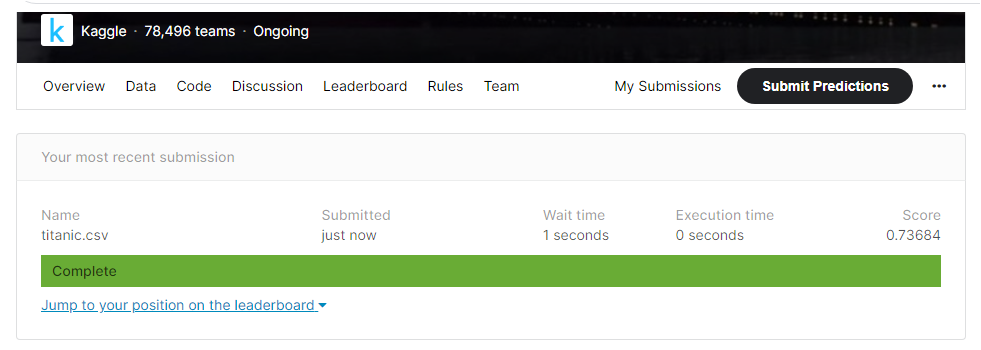

Para intentar mejorar los resultado se crea un voting classifier con los modelos usados previamente

In [42]:
from sklearn.ensemble import VotingClassifier
  
estimator = []

estimator.append(('KNN', KNeighborsClassifier()))
estimator.append(('DTC', DecisionTreeClassifier()))
estimator.append(('RFC', RandomForestClassifier()))
estimator.append(('GNB', GaussianNB()))
estimator.append(('SVC', SVC()))
  
# Voting Classifier with hard voting
vot_hard = VotingClassifier(estimators = estimator, voting ='hard') 
vot_hard.fit(X_train, y_train)
y_pred_voting = vot_hard.predict(X_test)
acc_voting = accuracy_score(y_test, y_pred_voting)
acc_voting

0.7877094972067039

In [43]:
# nuevas predicciones 
y_pred_test = vot_hard.predict(df_test)

# creamos columna con los resultados
df_submission['Survived'] = y_pred_test

# guardamos resultados en csv
df_submission.to_csv('titanic2.csv', index=False)

Los resultados de esta prediccion son los siguientes:

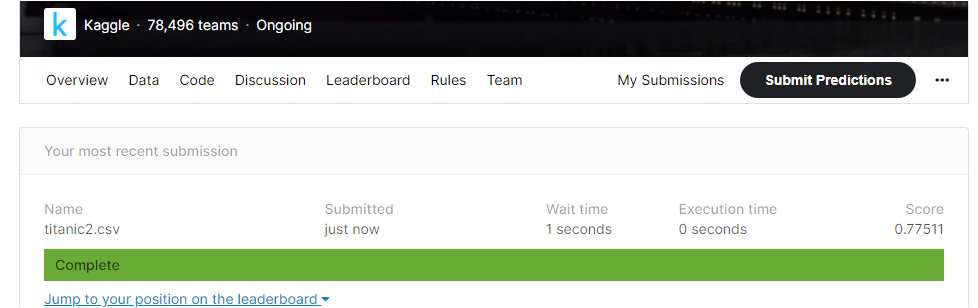